In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy.linalg as LA
import scipy.stats as sts
import pandas as pd
%matplotlib notebook

# 1. 
## (a)

In [3]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [4]:
rho = 0.85
mu = 11.4
z = np.zeros(500)
for i in range(0, 500): 
    if i == 0: 
        z[i] = mu
    else: 
        z[i] = rho * z[i-1] + (1-rho) * mu + eps_vec[i-1]

            

<IPython.core.display.Javascript object>


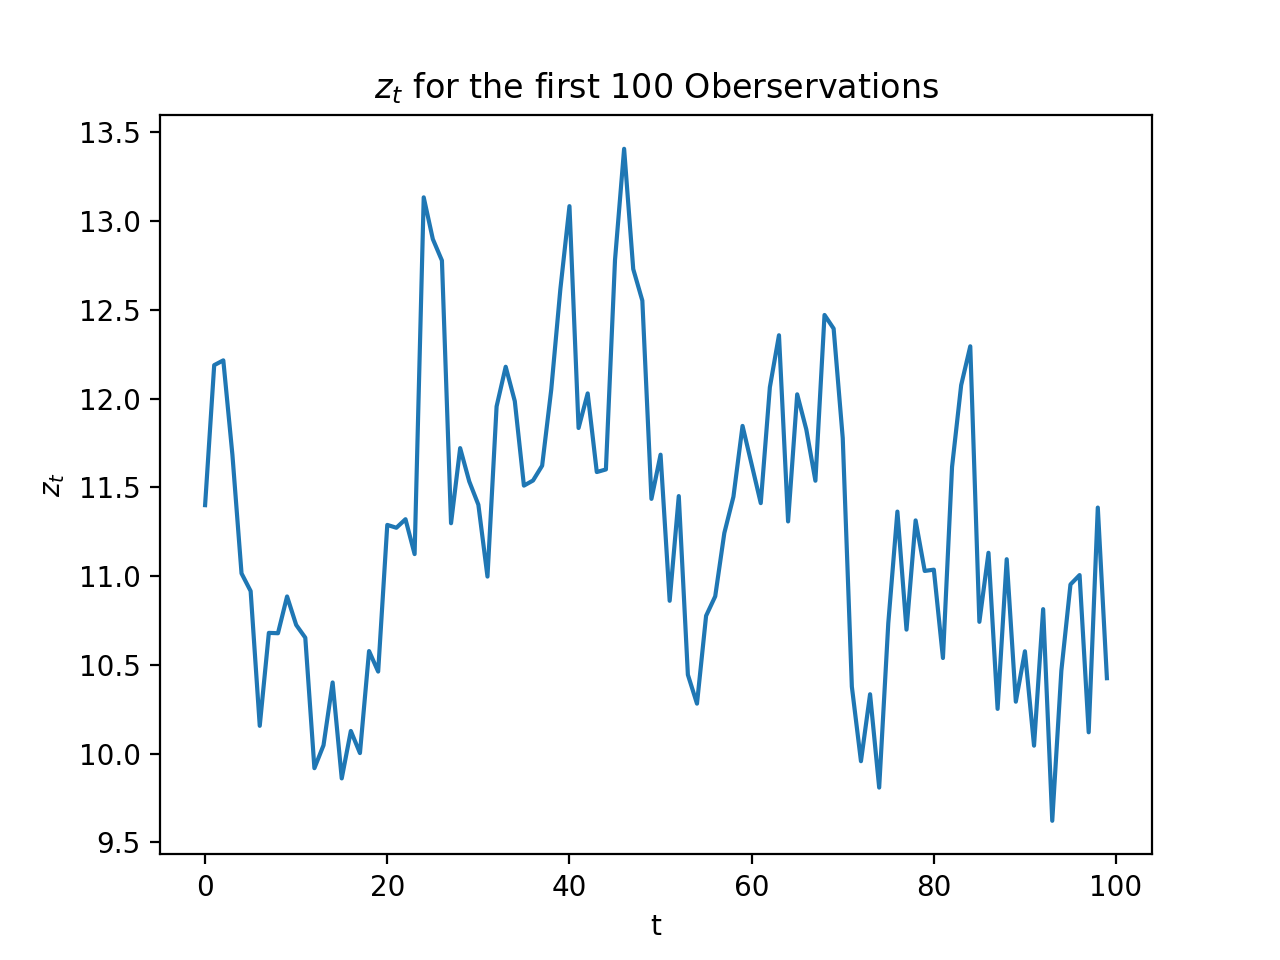

In [5]:
plt.plot(z[:100])
plt.title("$z_t$ for the first 100 Oberservations")
plt.ylabel("$z_t$")
plt.xlabel("t")
plt.show()


## (b)

In [7]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)
print(z_vals)
print(z.max())
print(z.min())

[ 9.3  10.35 11.4  12.45 13.5 ]
14.941627264106746
7.7317590279262784


## (c)

In [32]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
bins = np.digitize(z, z_cuts)
p5 = np.zeros(shape = (5,5))

In [33]:
for i in range(0,5):
    for j in range(0,5):
        freq = 0
        tot = 0
        for k in range(0,499):
            pres = bins[k]
            nxt = bins[k+1]
            if pres == i and nxt == j:
                freq += 1
            if pres == i:
                tot += 1
        p5[i][j] = freq/tot
print("The corresponding transition matrix is:", p5)

The corresponding transition matrix is: [[0.6875     0.27083333 0.04166667 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


## (d)

In [24]:
Z_t = np.array([0, 0, 1, 0, 0]).reshape(5, 1)
result = np.dot(LA.matrix_power(p5.T, 3),Z_t)
print(result)

[[0.07251875]
 [0.24474395]
 [0.356121  ]
 [0.24602846]
 [0.08058785]]


In [25]:
print("The probability is", result[4])

The probability is [0.08058785]


## (e)

In [48]:
Z_0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0]).reshape(5,1)
Z_stat = np.dot(LA.matrix_power(p5.T, 200), Z_0)
print("The stationary distribution is:", Z_stat)


The stationary distribution is: [[0.10265479]
 [0.24205688]
 [0.32442728]
 [0.23579876]
 [0.09506228]]


## (f)

In [56]:
z_0 = mu

x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(p5[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

<IPython.core.display.Javascript object>


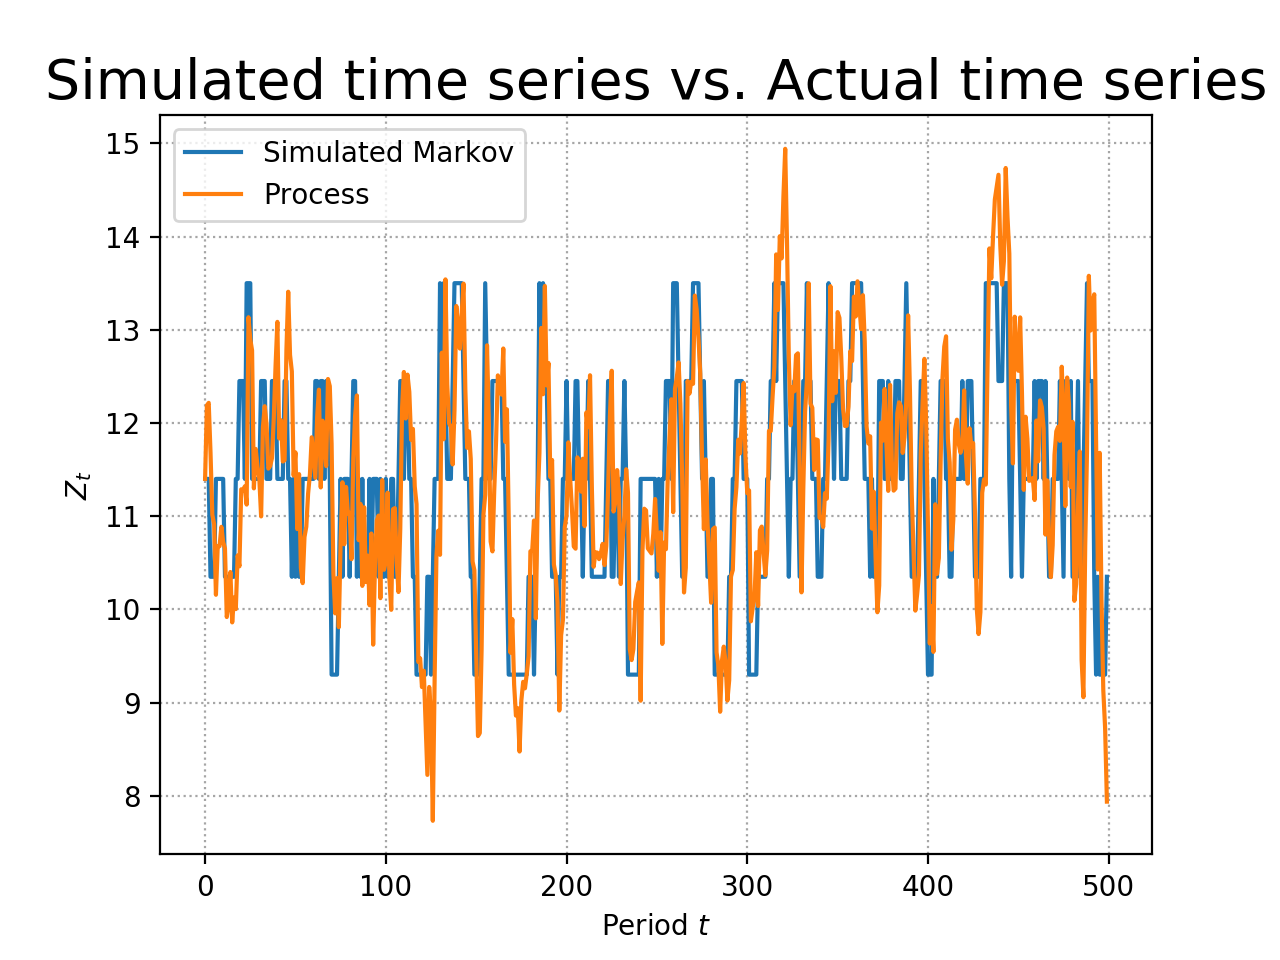

In [57]:
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Simulated time series vs. Actual time series', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Process'])
plt.show()